<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np

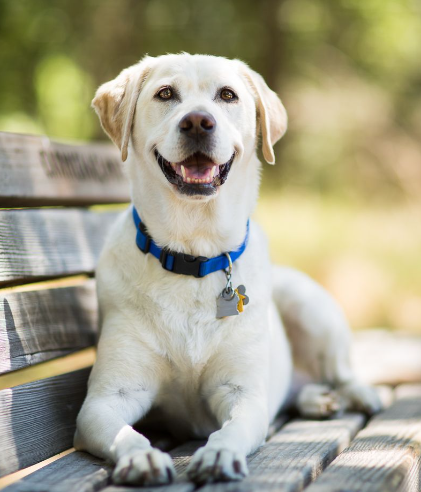

In [3]:
pil_im = Image.open('dog.png')
pil_im

In [4]:
im = np.array(Image.open('dog.png'))
print(im.shape, im.dtype)

(492, 421, 4) uint8


In [ ]:
im = np.array(Image.open('dog.png').convert('L'),'f')
print(im.shape, im.dtype)

In [5]:
value = im[2,3]

array([[194, 191, 188, ...,  82,  83,  83],
       [195, 192, 189, ...,  81,  82,  82],
       [197, 194, 191, ...,  81,  82,  82],
       ...,
       [ 92, 101, 112, ..., 101, 116, 111],
       [110, 117, 124, ..., 113, 119, 128],
       [121, 125, 127, ...,  97, 130, 126]], dtype=uint8)
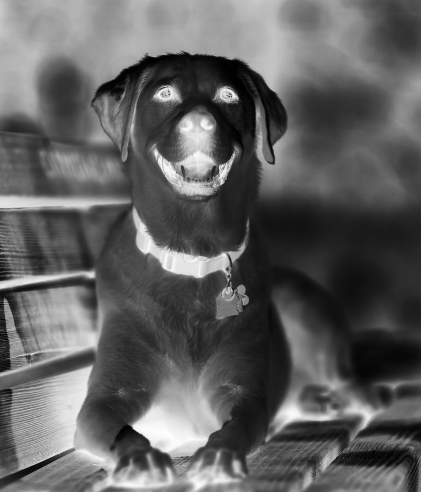

In [6]:
im = np.array(Image.open('dog.png').convert('L'))
im2 = 255 - im
im2

In [7]:
im3 = (100/255)*im + 100
im3

array([[123.92156863, 125.09803922, 126.2745098 , ..., 167.84313725,
        167.45098039, 167.45098039],
       [123.52941176, 124.70588235, 125.88235294, ..., 168.23529412,
        167.84313725, 167.84313725],
       [122.74509804, 123.92156863, 125.09803922, ..., 168.23529412,
        167.84313725, 167.84313725],
       ...,
       [163.92156863, 160.39215686, 156.07843137, ..., 160.39215686,
        154.50980392, 156.47058824],
       [156.8627451 , 154.11764706, 151.37254902, ..., 155.68627451,
        153.33333333, 149.80392157],
       [152.54901961, 150.98039216, 150.19607843, ..., 161.96078431,
        149.01960784, 150.58823529]])

In [8]:
print(im.min(),im.max())

1 255


In [9]:
!pip install opencv-python-headless

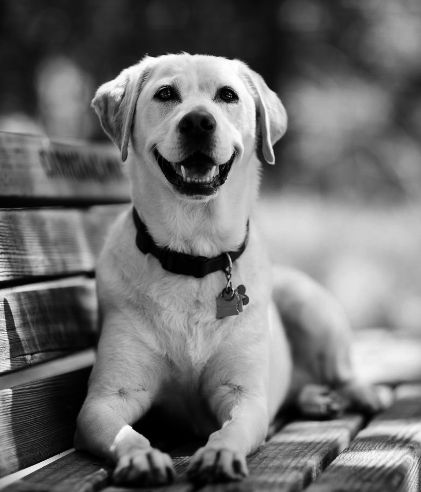

In [10]:
from google.colab.patches import cv2_imshow

im4 = 255*(im/255)**2
cv2_imshow(im4)


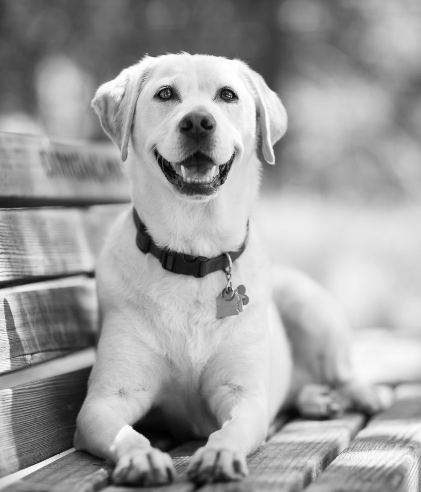

In [11]:
pil_im = Image.fromarray(np.uint8(im))
pil_im

In [12]:
def imresize(im,sz):
  """ Change shape of array using PIL"""
  pil_im = Image.fromarray(np.int8(im))
  return np.array(pil_im.resize(sz))

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def histeq(im, nbr_bins=256):
    """
    Perform histogram equalization on the input image.

    Parameters:
    - im: Input image (2D array).
    - nbr_bins: Number of bins for histogram computation (default: 256).

    Returns:
    - im2: Equalized image.
    - cdf: Cumulative distribution function of the image histogram.
    """
    # Compute histogram
    imhist, bins = np.histogram(im.flatten(), bins=nbr_bins, density=True)
    cdf = imhist.cumsum() # Cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # Normalize

    # Use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(), bins[:-1], cdf)

    # Plot original image and histogram
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(im, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].hist(im.flatten(), bins=nbr_bins, color='blue', alpha=0.7)
    axs[1].plot(cdf, color='red')
    axs[1].set_title('Histogram Equalization')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return im2.reshape(im.shape), cdf

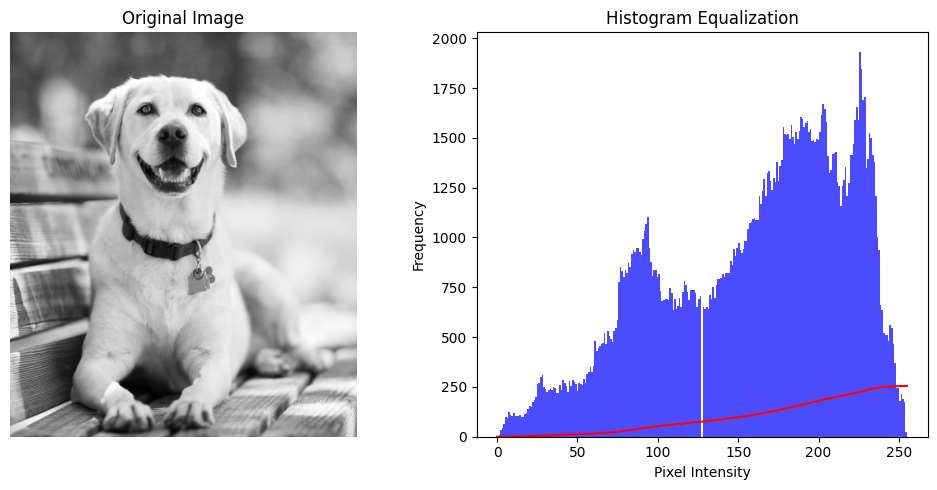

(array([[ 15.98101256,  17.64984967,  19.46014683, ..., 130.61957581,
         128.98934868, 128.98934868],
        [ 15.41466825,  17.07922074,  18.8495605 , ..., 132.28817057,
         130.61957581, 130.61957581],
        [ 14.48358903,  15.98101256,  17.64984967, ..., 132.28817057,
         130.61957581, 130.61957581],
        ...,
        [114.82603927, 102.67544102,  90.08976075, ..., 102.67544102,
          86.04020111,  91.12085948],
        [ 92.21012038,  85.04667513,  78.58578029, ...,  89.06953833,
          83.07581164,  75.38265454],
        [ 81.25731361,  77.7859149 ,  76.1828689 , ..., 107.88730352,
          74.49091233,  76.97831395]]),
 array([1.10798911e-02, 5.04750594e-02, 1.02181218e-01, 1.79740455e-01,
        3.00388158e-01, 4.16111465e-01, 5.68767742e-01, 7.00495336e-01,
        8.30991831e-01, 9.76261514e-01, 1.10675801e+00, 1.23725450e+00,
        1.36775100e+00, 1.49947859e+00, 1.62381959e+00, 1.74446730e+00,
        1.88727478e+00, 2.03623776e+00, 2.2061294

In [15]:
histeq(im)